In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, pylab as pl, itertools as it
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from implementations import *
from proj1_helpers import *

# 1. Choosing a model

Simple linear model:
$y = w_1x_1+\dots + w_nx_n$

In [2]:
feature_cols = [1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 22]

N_VALID_FEATURES = len(feature_cols)

In [3]:
y, input_data, ids = load_clean_csv("train.csv", sub_sample=False, missing_val="median", normalized=True)

In [4]:
print(input_data.shape)
print(y.shape)
print(ids.shape)

(250000, 30)
(250000,)
(250000,)


In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    y_te = y[k_indices[k]]    
    x_te = x[k_indices[k]]
    
    y_tr = np.delete(y, k_indices[k], axis=0)
    x_tr = np.delete(x, k_indices[k], axis=0)
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    Phi_tr = build_poly(x_tr, degree)
    Phi_te = build_poly(x_te, degree)
    # form data with polynomial degree: TODO
    # ***************************************************
    w, loss_tr = ridge_regression(y_tr, Phi_tr, lambda_)
    # ridge regression: TODO
    # ***************************************************
    loss_te = compute_mse(y_te, Phi_te, w)
    loss_tr = compute_mse(y_tr, Phi_tr, w)
    # calculate the loss for train and test data: TODO
    # ***************************************************
    return loss_tr, loss_te, w

In [6]:
x = input_data[:,feature_cols]
degree = 1
k_fold = 4
lambdas = np.logspace(-4, 0, 30)
rmse_tr = []
rmse_te = []
w_init = np.zeros(12)

k_indices = build_k_indices(y, k_fold, 1)
for l in lambdas:
    rmse_tr_tmp = []
    rmse_te_tmp = []
    for k in range(k_fold): 
        loss_tr, loss_te, w = cross_validation(y, x, k_indices, k, l, degree)
        w = w_init + w
        rmse_tr_tmp.append(loss_tr)
        rmse_te_tmp.append(loss_te)
    w = w/k_fold 
    rmse_tr.append(np.mean(np.sqrt(2*rmse_tr_tmp)))
    rmse_te.append(np.mean(np.sqrt(2*rmse_te_tmp)))


In [21]:
# Get the weight when lambda=0.05 
w_init = np.zeros(12)

for k in range(k_fold): 
    loss_tr, loss_te, w = cross_validation(y, x, k_indices, k, 0.05, degree)
    w = w_init + w
w = w/k_fold 


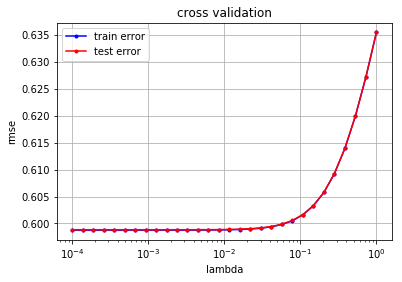

In [8]:
plt.semilogx(lambdas, rmse_tr, marker=".", color='b', label='train error')
plt.semilogx(lambdas, rmse_te, marker=".", color='r', label='test error')
plt.xlabel("lambda")
plt.ylabel("rmse")
plt.title("cross validation")
plt.legend(loc=2)
plt.grid(True)

4-th order linear model:
$y = w_0+w_1x_1+\dots+ w_nx_1^n +\dots$

# Test set

In [9]:
y_test, inputs_test, ids_test = load_clean_csv('test.csv', sub_sample=False, missing_val="median")

In [10]:
print(inputs_test.shape)

(568238, 30)


In [11]:
tx_test = build_poly(inputs_test[:,feature_cols], degree)
tx_test.shape
#tx = build_poly_plus(y, inputs_test[:,feature_cols], degree)

(568238, 12)

In [19]:
y_pred = predict_labels(w, tx_test)
y_pred.shape

(568238,)

In [20]:
create_csv_submission(ids_test, y_pred, 'prediction_zilu.csv')